In [28]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import geobr
import pandas as pd
import numpy as np

from plt import plot_brazil

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
df_original = pd.read_excel('generos_especies.xlsx')

list_state_uf = [
    ('Acre', 'AC'), ('Alagoas', 'AL'), ('Amazonas', 'AM'), ('Amapá', 'AP'), ('Amapa', 'AP'),
    ('Bahia', 'BA'),
    ('Ceará', 'CE'), ('Ceara', 'CE'),
    ('Distrito Federal', 'DF'),
    ('Espírito Santo', 'ES'), ('Espirito Santo', 'ES'),
    ('Goiás', 'GO'), ('Goias', 'GO'),
    ('Maranhao', 'MA'), ('Maranhão', 'MA'), ('Mato Grosso', 'MT'), ('Mato Grosso do Sul', 'MS'), ('Minas Gerais', 'MG'),
    ('Pará', 'PA'), ('Para', 'PA'), ('Paraíba', 'PB'), ('Paraiba', 'PB'), ('Paraná', 'PR'), ('Parana', 'PR'),
    ('Pernambuco', 'PE'), ('Piauí', 'PI'),
    ('Rio de Janeiro', 'RJ'), ('Rio Grande do Norte', 'RN'), ('Rio Grande do Sul', 'RS'),
    ('Rondônia', 'RO'), ('Rondonia', 'RO'), ('Roraima', 'RR'),
    ('Santa Catarina', 'SC'),
    ('São Paulo', 'SP'), ('Sao Paulo', 'SP'), ('Sergipe', 'SE'),
    ('Tocantins', 'TO')
]

list_uf = np.unique([item[1] for item in list_state_uf])

for state_uf in list_state_uf:
    df_original = df_original.replace(state_uf[0], state_uf[1])
df_original.head(5)

,genus,specific_epithet,barcode,country,state_province,county
0,Manekia,obtusa,FURB37074,Brasil,SC,Águas Mornas
1,Manekia,obtusa,FURB37078,Brasil,SC,Blumenau
2,Manekia,obtusa,FURB37079,Brasil,SC,Florianópolis
3,Manekia,obtusa,FURB37080,Brasil,SC,Taió
4,Manekia,obtusa,HUEFS0178690,Brasil,SP,Picinguaba


In [30]:
df_species_br = df_original.groupby(['specific_epithet'])['specific_epithet'].count().reset_index(
    name='count_species_br')
df_species_br.loc[len(df_species_br)] = ['sum/count', df_species_br['count_species_br'].sum()]
df_species_br.head(5)

,specific_epithet,count_species_br
0,abutiloides,8
1,aduncum,377
2,aequale,30
3,alata,81
4,alatabaccum,28


In [31]:
df_species_state = df_original[['specific_epithet', 'state_province']]
df_species_state = df_species_state.groupby(['specific_epithet', 'state_province'])[
    'specific_epithet'].count().reset_index(name='count_species_per_state')
df_species_state.head(5)

,specific_epithet,state_province,count_species_per_state
0,abutiloides,ES,3
1,abutiloides,MG,1
2,abutiloides,PR,2
3,abutiloides,RJ,1
4,abutiloides,SP,1


### count number of species (with minimium five images)

In [32]:
df_count_species_state = df_species_br.copy()
df_count_species_state[list_uf] = 0
df_count_species_state['sum'] = 0

# distribui as imagens por estado
for index, row in df_species_state.iterrows():
    i = df_count_species_state.index[row['specific_epithet'] == df_count_species_state['specific_epithet']].to_list()[0]
    df_count_species_state.loc[i, row['state_province']] = row['count_species_per_state']

df_count_species_state.loc[len(df_count_species_state) - 1, list_uf] = (df_count_species_state[list_uf] >= 5).sum()
df_count_species_state.tail(1)

,specific_epithet,count_species_br,AC,AL,AM,AP,BA,CE,DF,ES,...,RJ,RN,RO,RR,RS,SC,SE,SP,TO,sum
235,sum/count,10517,34,0,61,9,43,1,22,24,...,32,0,19,14,4,44,0,50,3,0


### sum all values greater than five

In [33]:
df_sum_imgs_state = df_count_species_state.copy()
df_sum_imgs_state.at[len(df_sum_imgs_state), 'specific_epithet'] = 'sum_imgs'
df_sum_imgs_state.loc[len(df_sum_imgs_state) - 1, list_uf] = \
df_sum_imgs_state.iloc[1:len(df_sum_imgs_state) - 2][df_sum_imgs_state[list_uf] >= 5][list_uf].sum()
df_sum_imgs_state.fillna(0)
df_sum_imgs_state.tail(1)

,specific_epithet,count_species_br,AC,AL,AM,AP,BA,CE,DF,ES,...,RJ,RN,RO,RR,RS,SC,SE,SP,TO,sum
236,sum_imgs,NaN,373.0,0.0,1029.0,66.0,894.0,8.0,373.0,246.0,...,586.0,0.0,164.0,133.0,55.0,937.0,0.0,783.0,41.0,NaN


### coverage images per species

In [34]:
df_coverage = df_sum_imgs_state.copy()
df_coverage.at[len(df_coverage), 'specific_epithet'] = 'coverage'
df_coverage.loc[len(df_coverage) - 1, list_uf] = df_coverage.loc[len(df_coverage) - 2, list_uf] / df_coverage.loc[
    len(df_coverage) - 3, list_uf]
df_coverage = df_coverage.fillna(0)
df_coverage.tail(3)

,specific_epithet,count_species_br,AC,AL,AM,AP,BA,CE,DF,ES,...,RJ,RN,RO,RR,RS,SC,SE,SP,TO,sum
235,sum/count,10517.0,34.000000,0.0,61.000000,9.000000,43.000000,1.0,22.000000,24.00,...,32.0000,0.0,19.000000,14.0,4.00,44.000000,0.0,50.00,3.000000,0.0
236,sum_imgs,0.0,373.000000,0.0,1029.000000,66.000000,894.000000,8.0,373.000000,246.00,...,586.0000,0.0,164.000000,133.0,55.00,937.000000,0.0,783.00,41.000000,0.0
237,coverage,0.0,10.970588,0.0,16.868852,7.333333,20.790698,8.0,16.954545,10.25,...,18.3125,0.0,8.631579,9.5,13.75,21.295455,0.0,15.66,13.666667,0.0


In [35]:
df_name_species = df_count_species_state.copy()
l = []

for uf in list_uf:
    index = df_name_species.loc[df_name_species.__getattr__(uf).ge(5)].index.to_list()
    lst_name_species = [df_name_species.specific_epithet.iloc[idx] for idx in index if idx <= len(df_name_species)-2]
    l.append({'uf':uf, 'lst_name_species': str(lst_name_species)})

df_name_species.loc[len(df_name_species),'specific_epithet']='lst_name_species'
for item in l:
    df_name_species.loc[len(df_name_species)-1, item['uf']] = item['lst_name_species']
df_name_species.tail(2)

,specific_epithet,count_species_br,AC,AL,AM,AP,BA,CE,DF,ES,...,RJ,RN,RO,RR,RS,SC,SE,SP,TO,sum
235,sum/count,10517.0,34.0,0.0,61.0,9.0,43.0,1.0,22.0,24.0,...,32.0,0.0,19.0,14.0,4.0,44.0,0.0,50.0,3.0,0.0
236,lst_name_species,NaN,"['aduncum', 'aleyreanum', 'anonifolium', 'arbo...",[],"['aduncum', 'aequale', 'alata', 'alatabaccum',...","['alatabaccum', 'amapense', 'anonifolium', 'ba...","['aduncum', 'alata', 'amalago', 'amplum', 'ani...",['tuberculatum'],"['aduncum', 'aequale', 'amalago', 'arboreum', ...","['aduncum', 'amalago', 'amplum', 'anisum', 'an...",...,"['aduncum', 'amalago', 'amplum', 'anisum', 'ar...",[],"['aduncum', 'aleyreanum', 'anonifolium', 'arbo...","['arboreum', 'bartlingianum', 'demeraranum', '...","['gaudichaudianum', 'mikanianum', 'tetraphylla...","['aduncum', 'alata', 'alnoides', 'amalago', 'a...",[],"['aduncum', 'alata', 'amalago', 'amplum', 'arb...","['dilatatum', 'pellucida', 'tuberculatum']",NaN


# plots

In [36]:
geobr.list_geobr()
states = geobr.read_state(year=2020)
regions = geobr.read_region(year=2020)
states['count_species'] = states['count_imgs'] = states['imgs_per_species'] = 0
states['lst_name_species'] = ''

Function: read_country
Geographies available: Country
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_region
Geographies available: Region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_state
Geographies available: States
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_meso_region
Geographies available: Meso region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_micro_region
Geographies available: Micro region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020

In [37]:
for uf in list_uf:
    index = states.index[states['abbrev_state'] == uf].to_list()[0]
    states.loc[index, 'count_species'] = df_coverage.loc[len(df_coverage) - 3, list_uf][uf]
    states.loc[index, 'count_imgs'] = df_coverage.loc[len(df_coverage) - 2, list_uf][uf]
    states.loc[index, 'imgs_per_species'] = df_coverage.loc[len(df_coverage) - 1, list_uf][uf]
    states.loc[index, 'lst_name_species'] = df_name_species.loc[len(df_name_species) - 1, list_uf][uf]

states.loc[:, ['count_species', 'count_imgs', 'imgs_per_species', 'lst_name_species']].head(5)

,count_species,count_imgs,imgs_per_species,lst_name_species
0,19,164,8.631579,"['aduncum', 'aleyreanum', 'anonifolium', 'arbo..."
1,34,373,10.970588,"['aduncum', 'aleyreanum', 'anonifolium', 'arbo..."
2,61,1029,16.868852,"['aduncum', 'aequale', 'alata', 'alatabaccum',..."
3,14,133,9.500000,"['arboreum', 'bartlingianum', 'demeraranum', '..."
4,33,434,13.151515,"['alatabaccum', 'aleyreanum', 'anonifolium', '..."


/home/xandao/miniconda3/lib/python3.9/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/home/xandao/miniconda3/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/xandao/miniconda3/lib/python3.9/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/home/xandao/miniconda3/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work

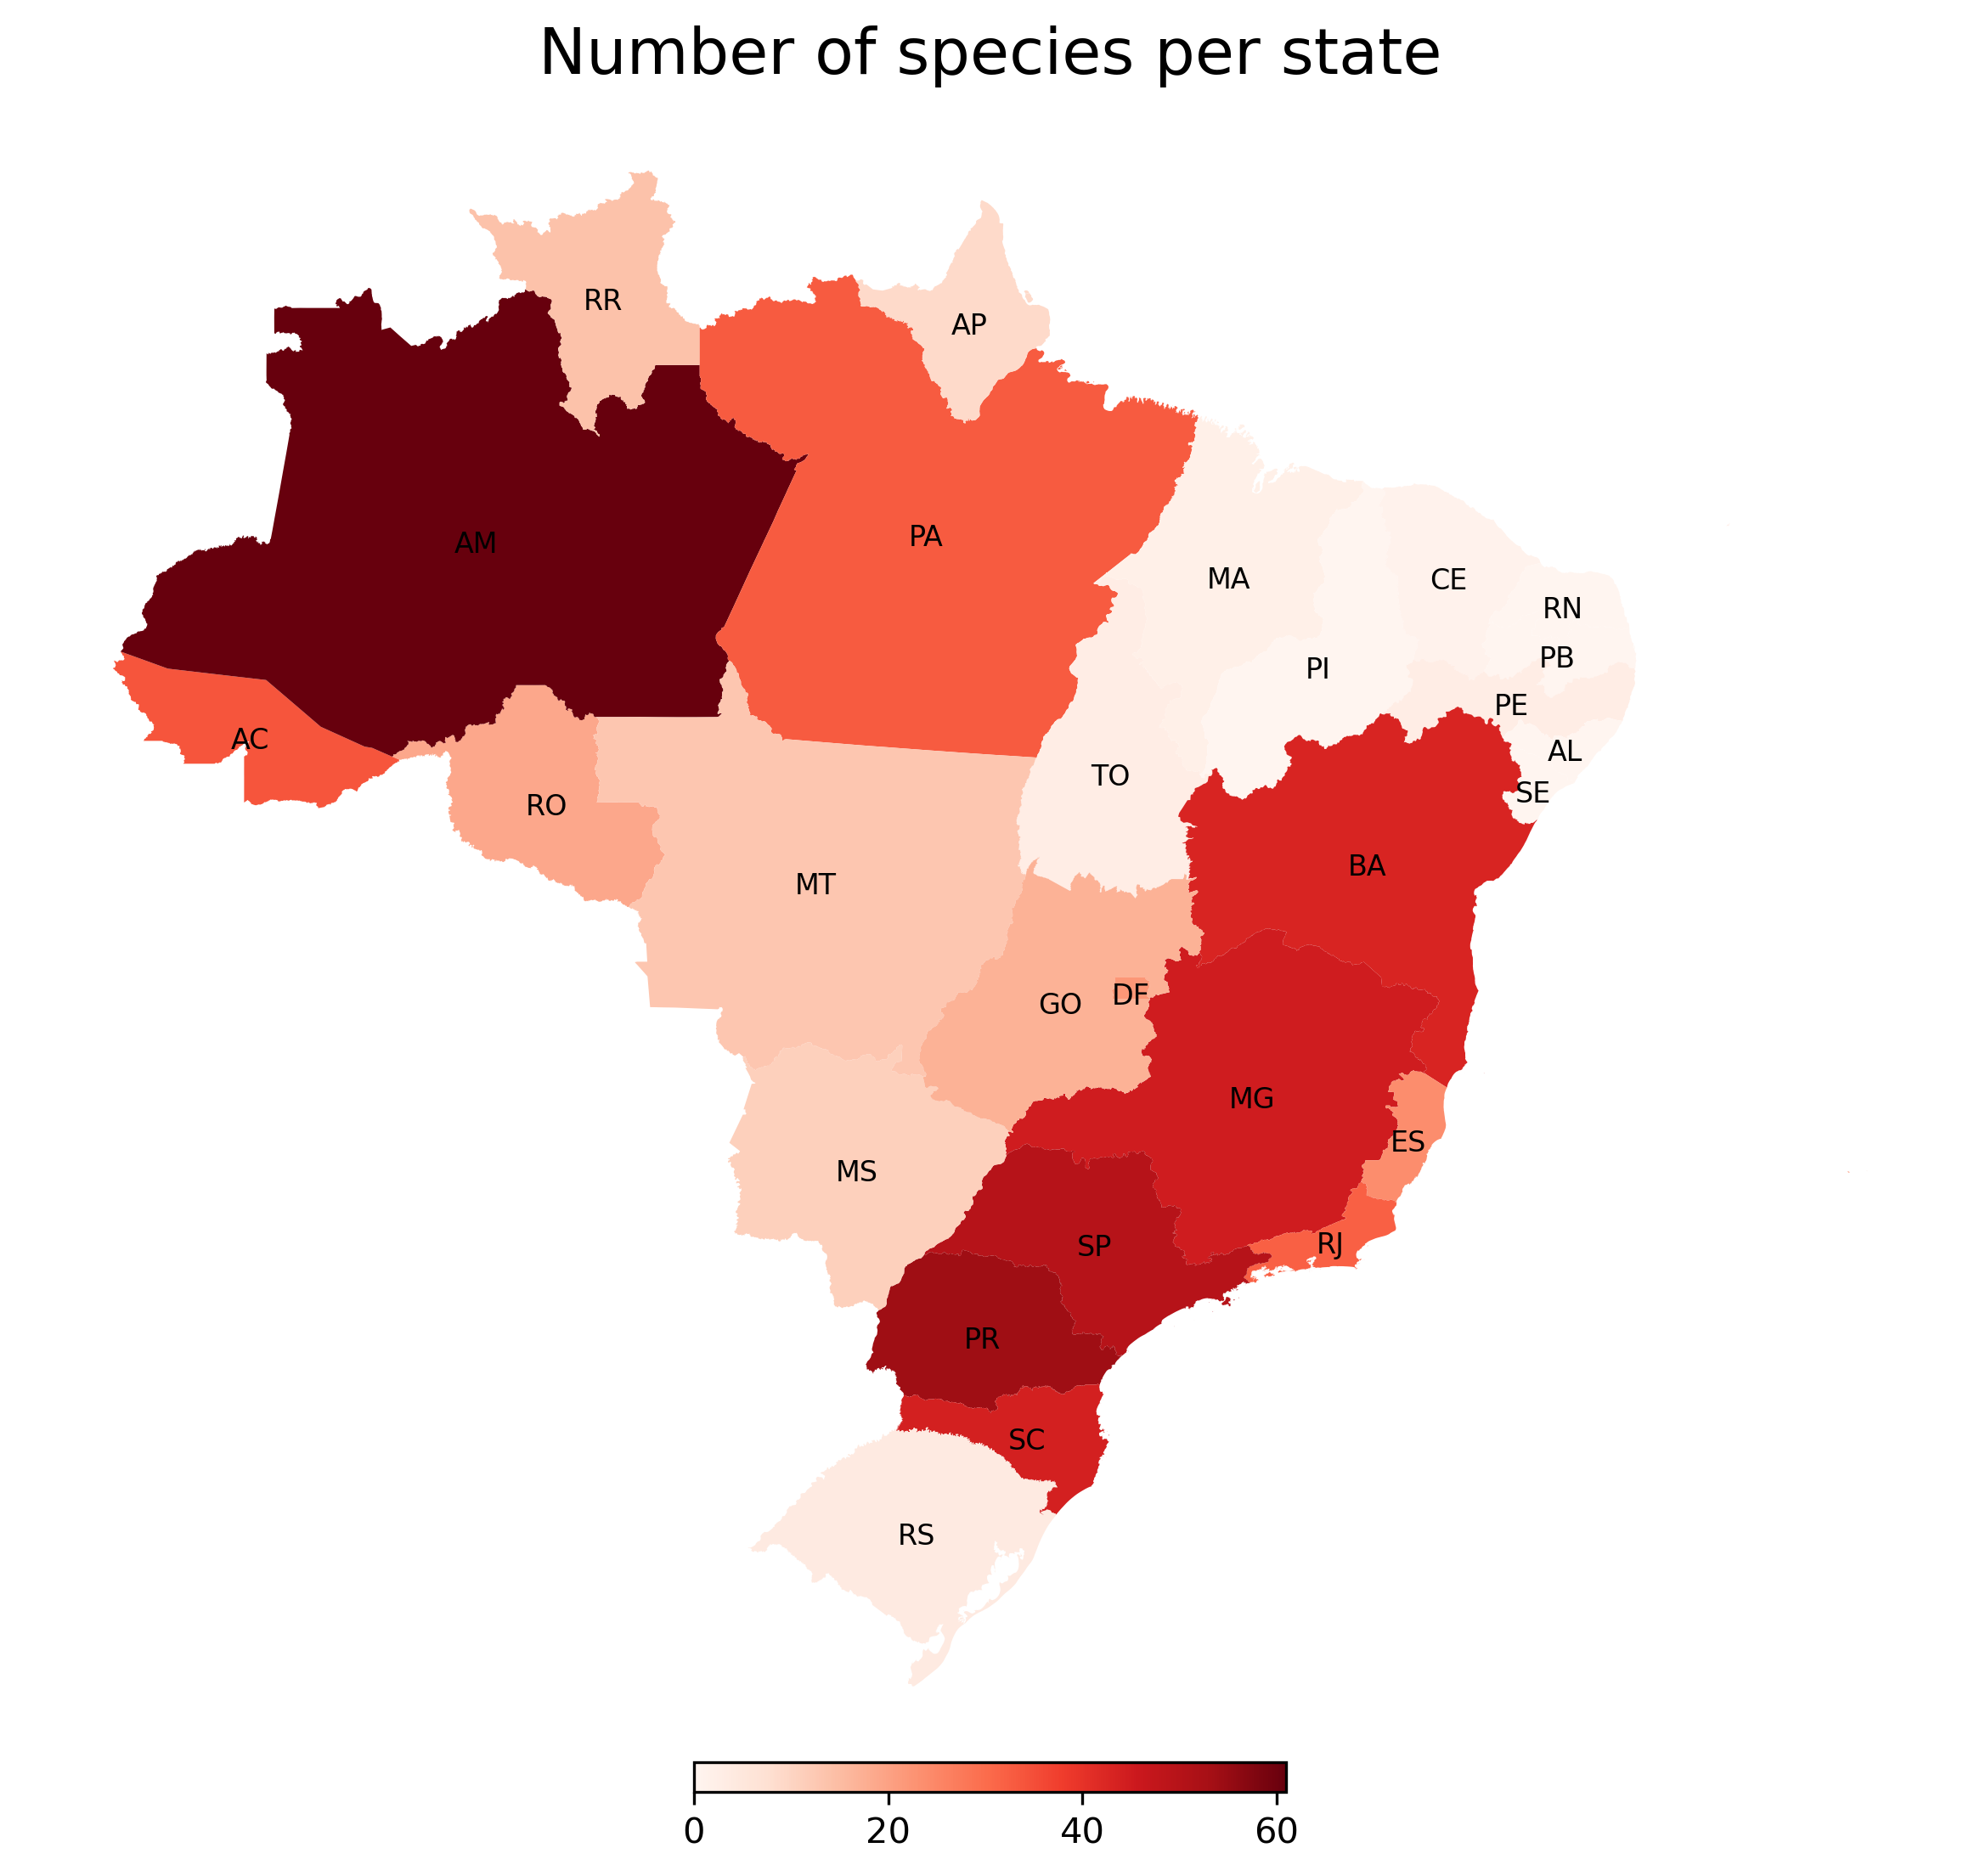

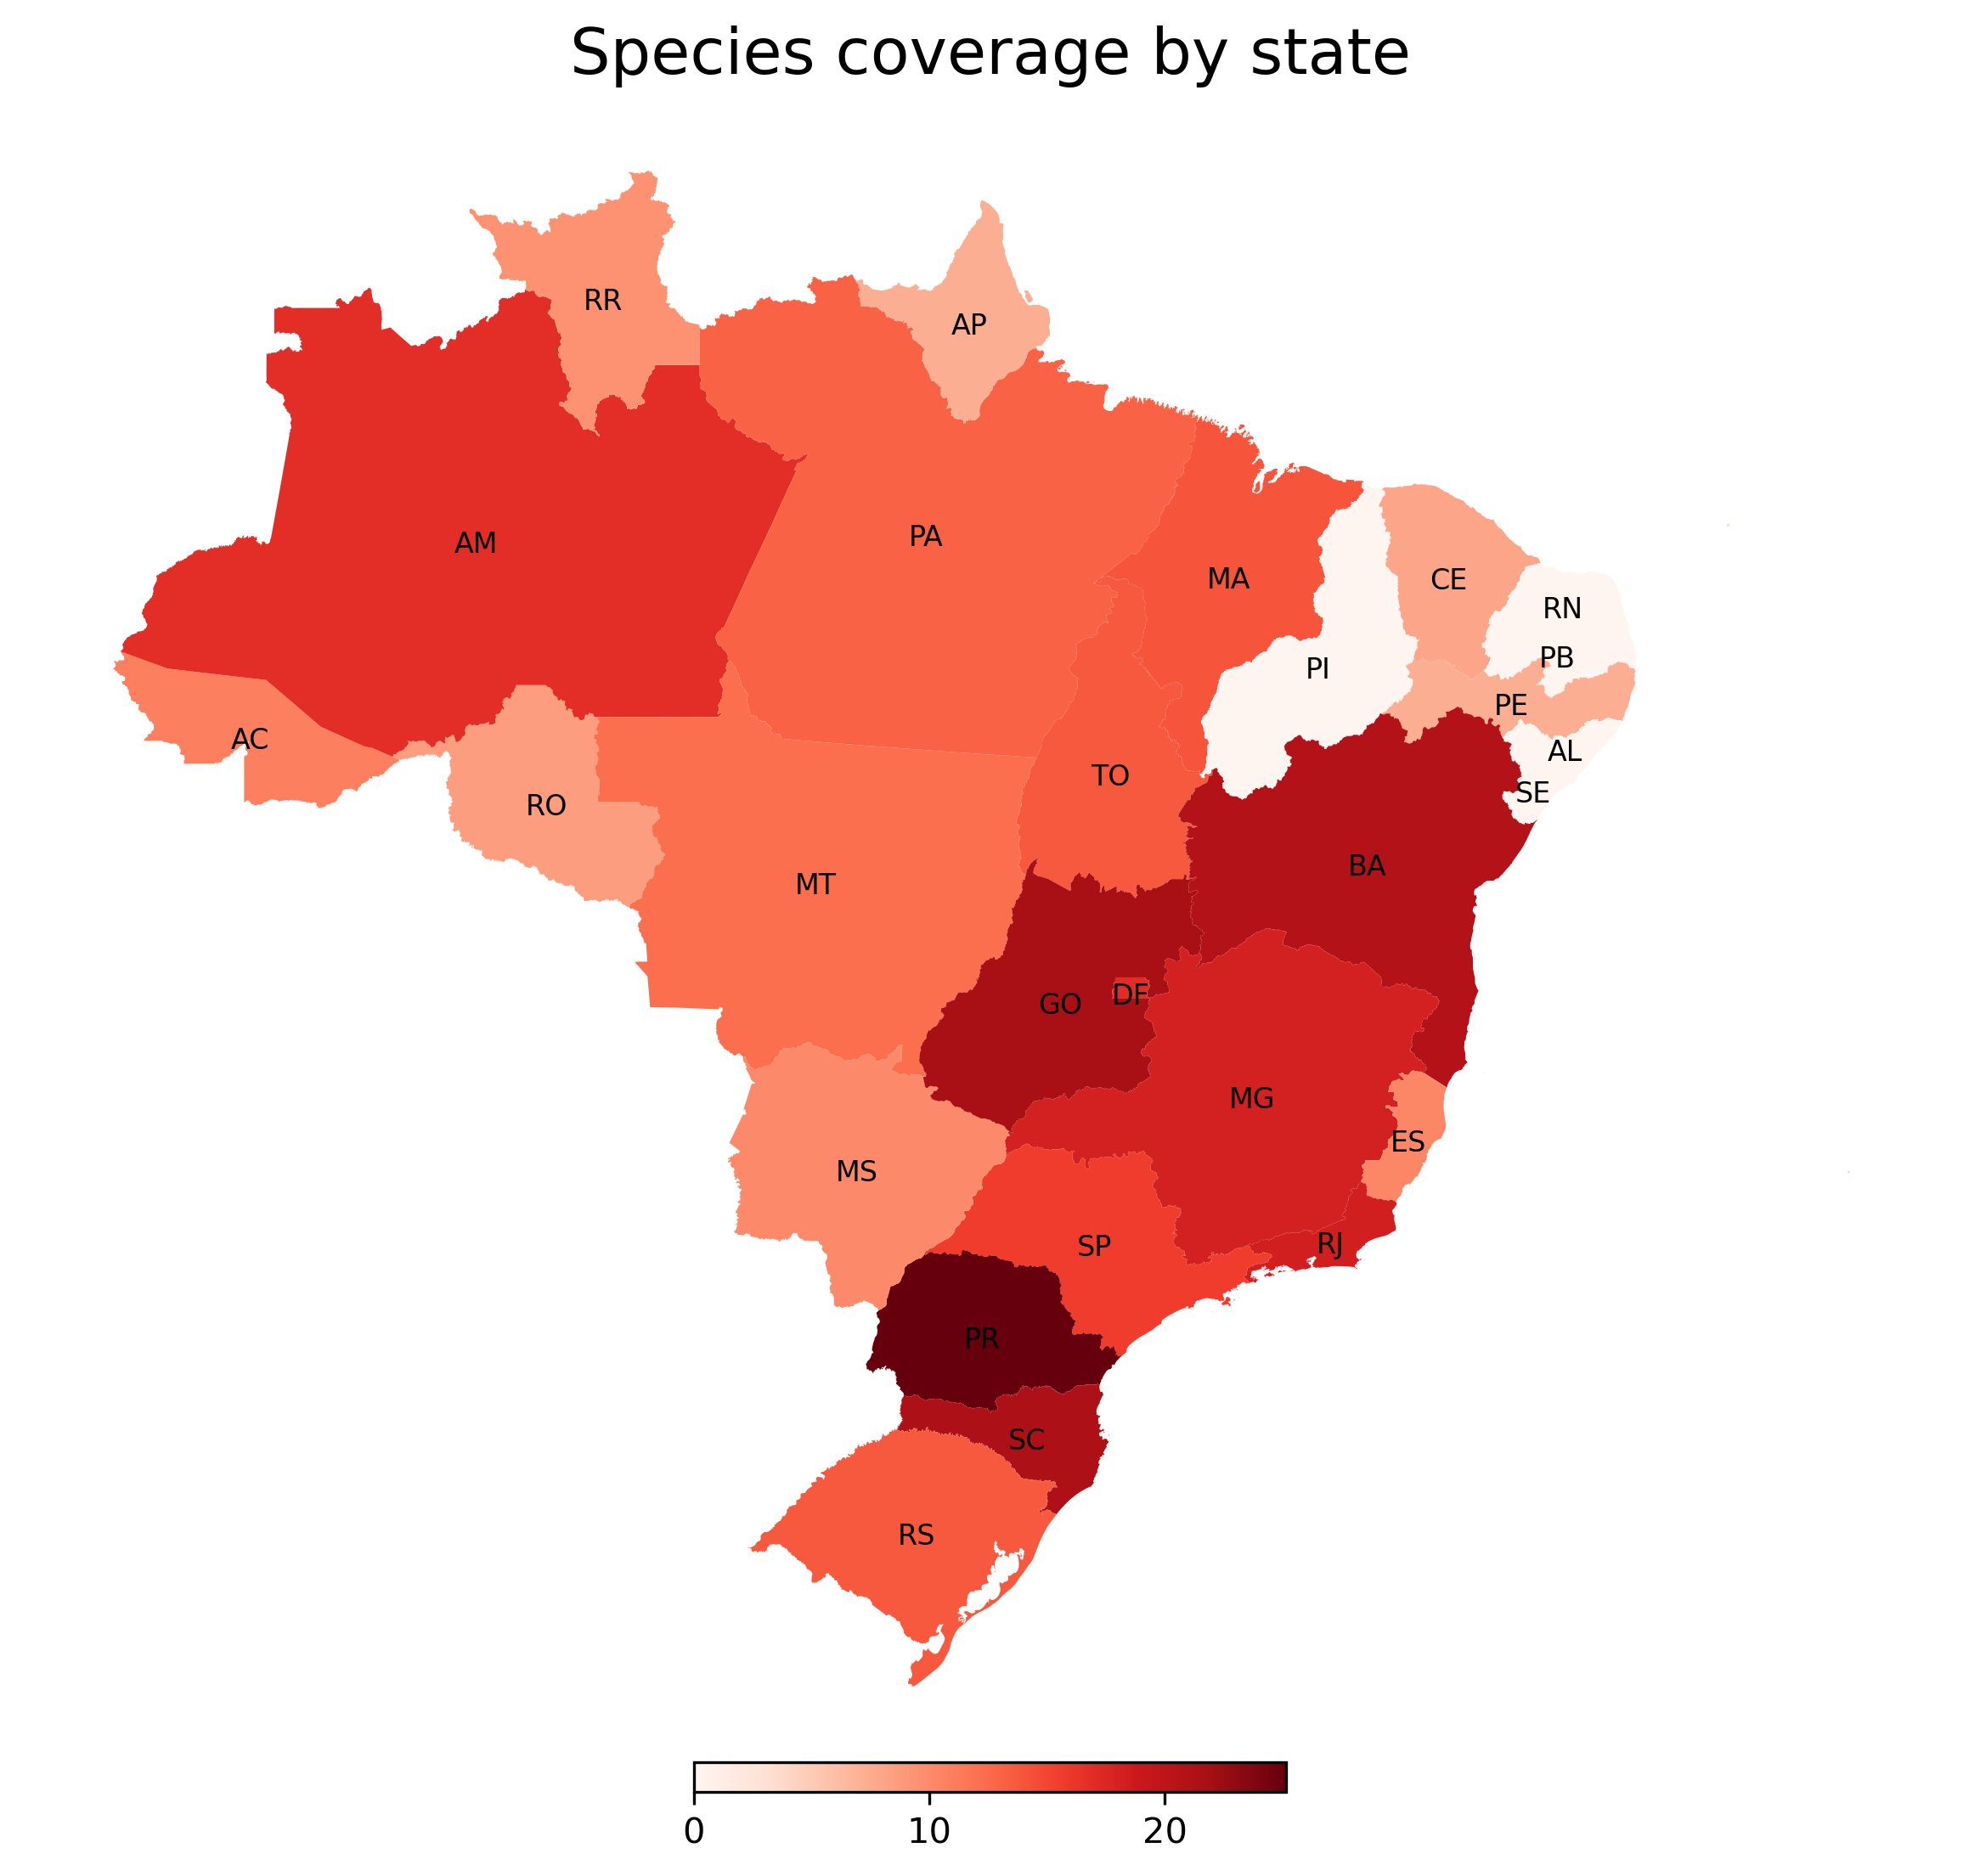

In [46]:
plot_brazil('count_species', 'abbrev_state', states, 'Number of species per state', fontsize=8)
plot_brazil('imgs_per_species', 'abbrev_state', states, 'Species coverage by state', fontsize=8)

### count species per region

In [39]:
regions['count_species_per_region'] = regions['count_imgs']= 0
regions['lst_name_species']=''
regions = regions[regions['code_region'].notna() & regions['name_region'].notna() & regions['geometry'].notna()]
regions

,code_region,name_region,geometry,count_species_per_region,count_imgs,lst_name_species
0,1.0,Norte,"MULTIPOLYGON (((-46.43676 -1.01905, -46.43723 ...",0,0,
1,2.0,Nordeste,"MULTIPOLYGON (((-38.94622 -13.38645, -38.94767...",0,0,
2,3.0,Sudeste,"MULTIPOLYGON (((-48.03716 -25.35794, -48.03822...",0,0,
3,4.0,Sul,"MULTIPOLYGON (((-52.10249 -31.79121, -52.10147...",0,0,
4,5.0,Centro Oeste,"MULTIPOLYGON (((-57.83371 -20.93628, -57.84443...",0,0,


In [40]:
for region in ['Norte', 'Nordeste', 'Centro Oeste', 'Sul', 'Sudeste']:
    regions.loc[regions.index[regions['name_region'] == region].to_list(), 'lst_name_species'] = states.groupby(states['name_region'])['lst_name_species'].agg(lambda x: ';'.join(x))[region]

for region in ['Norte', 'Nordeste', 'Centro Oeste', 'Sul', 'Sudeste']:
    species = states.groupby(states['name_region'])['lst_name_species'].agg(lambda x: ';'.join(x))[region]
    l = []
    if len(species.split(';')) > 0:
        for s in species.split(';'):
            s = s.replace('[', '').replace(']', '').replace('\'', '').split(', ')
            l = l + s
    regions.loc[regions.index[regions['name_region'] == region].to_list(), 'count_species_per_region'] = len(np.unique(l))

for region in ['Norte', 'Nordeste', 'Centro Oeste', 'Sul', 'Sudeste']:
    regions.loc[regions.index[regions['name_region'] == region].to_list(), 'count_imgs'] = \
    states.groupby(states['name_region'])['count_imgs'].sum()[region]

regions.loc[:, ['name_region', 'count_imgs', 'count_species_per_region', 'lst_name_species']]

,name_region,count_imgs,count_species_per_region,lst_name_species
0,Norte,2240,89,"['aduncum', 'aleyreanum', 'anonifolium', 'arbo..."
1,Nordeste,952,45,"['marginatum', 'tuberculatum'];[];['tuberculat..."
2,Sudeste,2430,85,"['aduncum', 'alata', 'amalago', 'amplum', 'ani..."
3,Sul,2351,63,"['aduncum', 'alata', 'amalago', 'amplum', 'arb..."
4,Centro Oeste,1011,37,"['aduncum', 'amalago', 'arboreum', 'arifolia',..."


/home/xandao/miniconda3/lib/python3.9/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/home/xandao/miniconda3/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


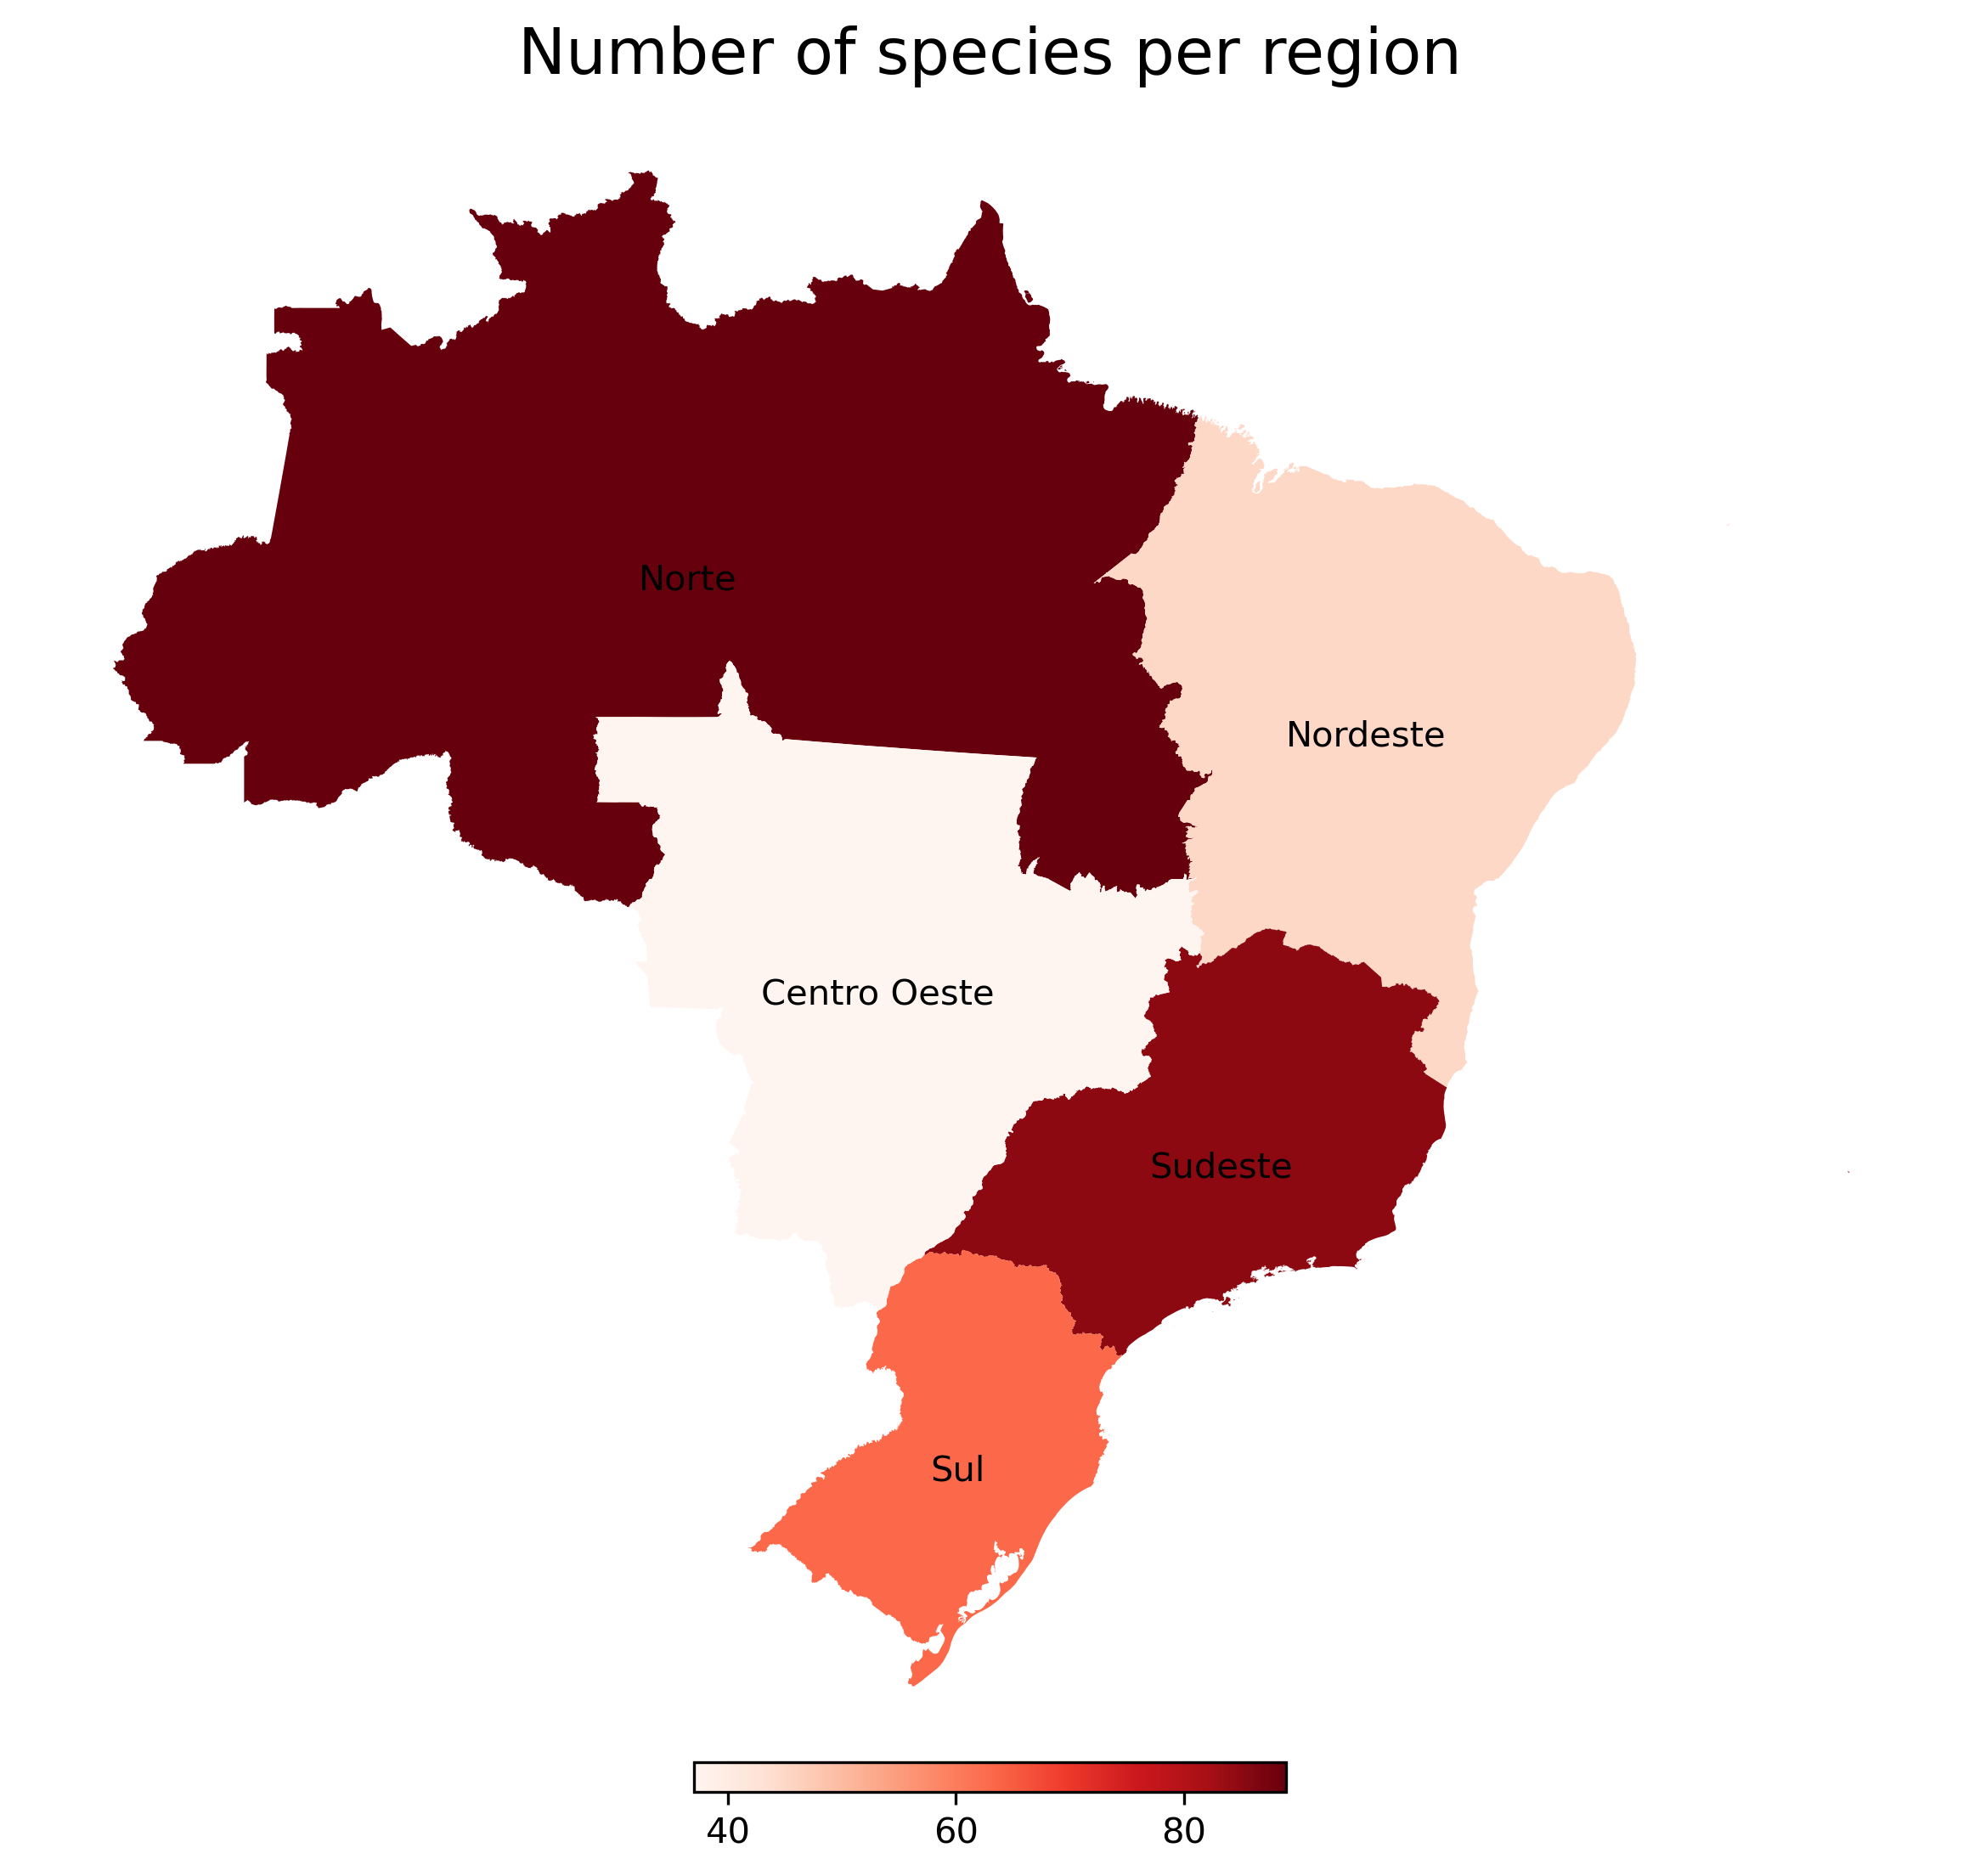

In [41]:
plot_brazil('count_species_per_region', 'name_region', regions, 'Number of species per region', fontsize=10,
            is_region=True)

### coverage species per region

In [42]:
regions['coverage_per_region'] = 0

In [43]:
for name_region in ['Norte', 'Nordeste', 'Centro Oeste', 'Sul', 'Sudeste']:
    regions.loc[regions.index[regions['name_region'] == name_region].to_list(), 'count_imgs'] = \
    states.groupby(states['name_region'])['count_imgs'].sum()[name_region]

regions

,code_region,name_region,geometry,count_species_per_region,count_imgs,lst_name_species,coverage_per_region
0,1.0,Norte,"MULTIPOLYGON (((-46.43676 -1.01905, -46.43723 ...",89,2240,"['aduncum', 'aleyreanum', 'anonifolium', 'arbo...",0
1,2.0,Nordeste,"MULTIPOLYGON (((-38.94622 -13.38645, -38.94767...",45,952,"['marginatum', 'tuberculatum'];[];['tuberculat...",0
2,3.0,Sudeste,"MULTIPOLYGON (((-48.03716 -25.35794, -48.03822...",85,2430,"['aduncum', 'alata', 'amalago', 'amplum', 'ani...",0
3,4.0,Sul,"MULTIPOLYGON (((-52.10249 -31.79121, -52.10147...",63,2351,"['aduncum', 'alata', 'amalago', 'amplum', 'arb...",0
4,5.0,Centro Oeste,"MULTIPOLYGON (((-57.83371 -20.93628, -57.84443...",37,1011,"['aduncum', 'amalago', 'arboreum', 'arifolia',...",0


In [44]:
for name_region in ['Norte', 'Nordeste', 'Centro Oeste', 'Sul', 'Sudeste']:
    regions.loc[regions.index[regions['name_region'] == name_region].to_list(), 'coverage_per_region'] = \
    regions.groupby(regions['name_region'])['count_imgs'].sum()[region] / regions.loc[
        regions['name_region'] == name_region, 'count_species_per_region']

regions.loc[:, ['name_region', 'coverage_per_region', 'count_imgs', 'count_species_per_region']]

,name_region,coverage_per_region,count_imgs,count_species_per_region
0,Norte,27.303371,2240,89
1,Nordeste,54.000000,952,45
2,Sudeste,28.588235,2430,85
3,Sul,38.571429,2351,63
4,Centro Oeste,65.675676,1011,37


/home/xandao/miniconda3/lib/python3.9/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/home/xandao/miniconda3/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/xandao/miniconda3/lib/python3.9/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/home/xandao/miniconda3/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work

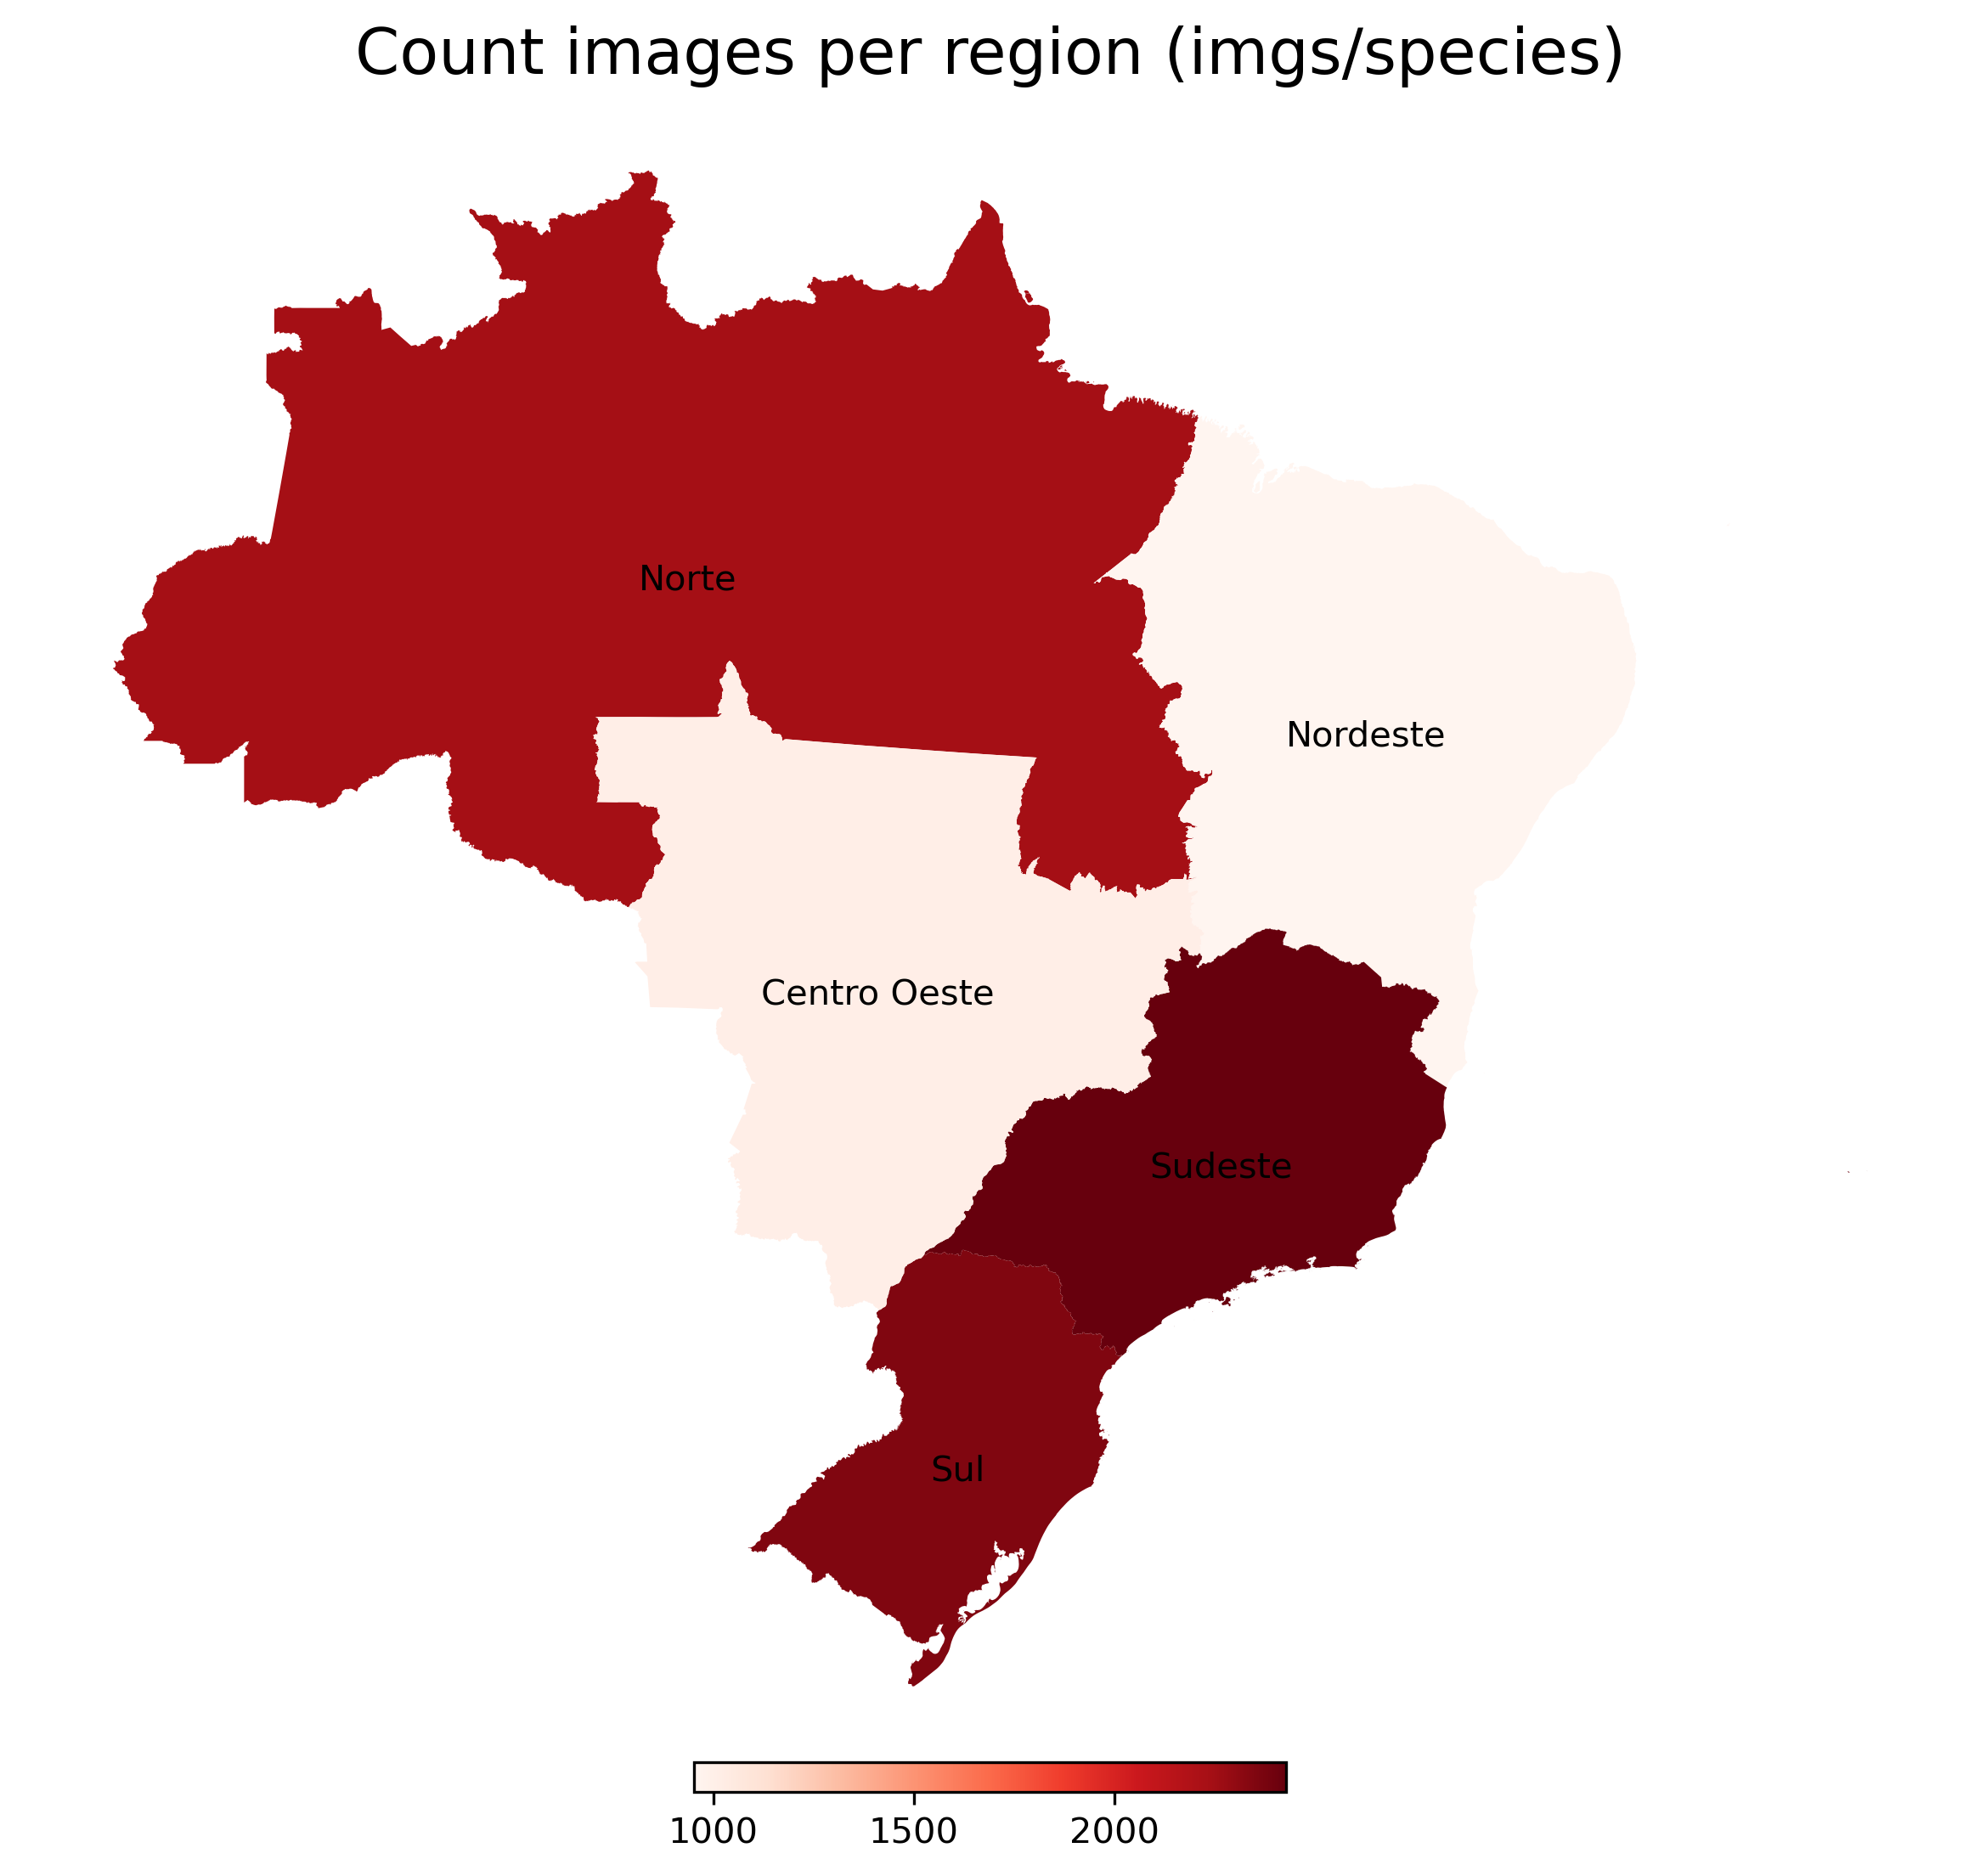

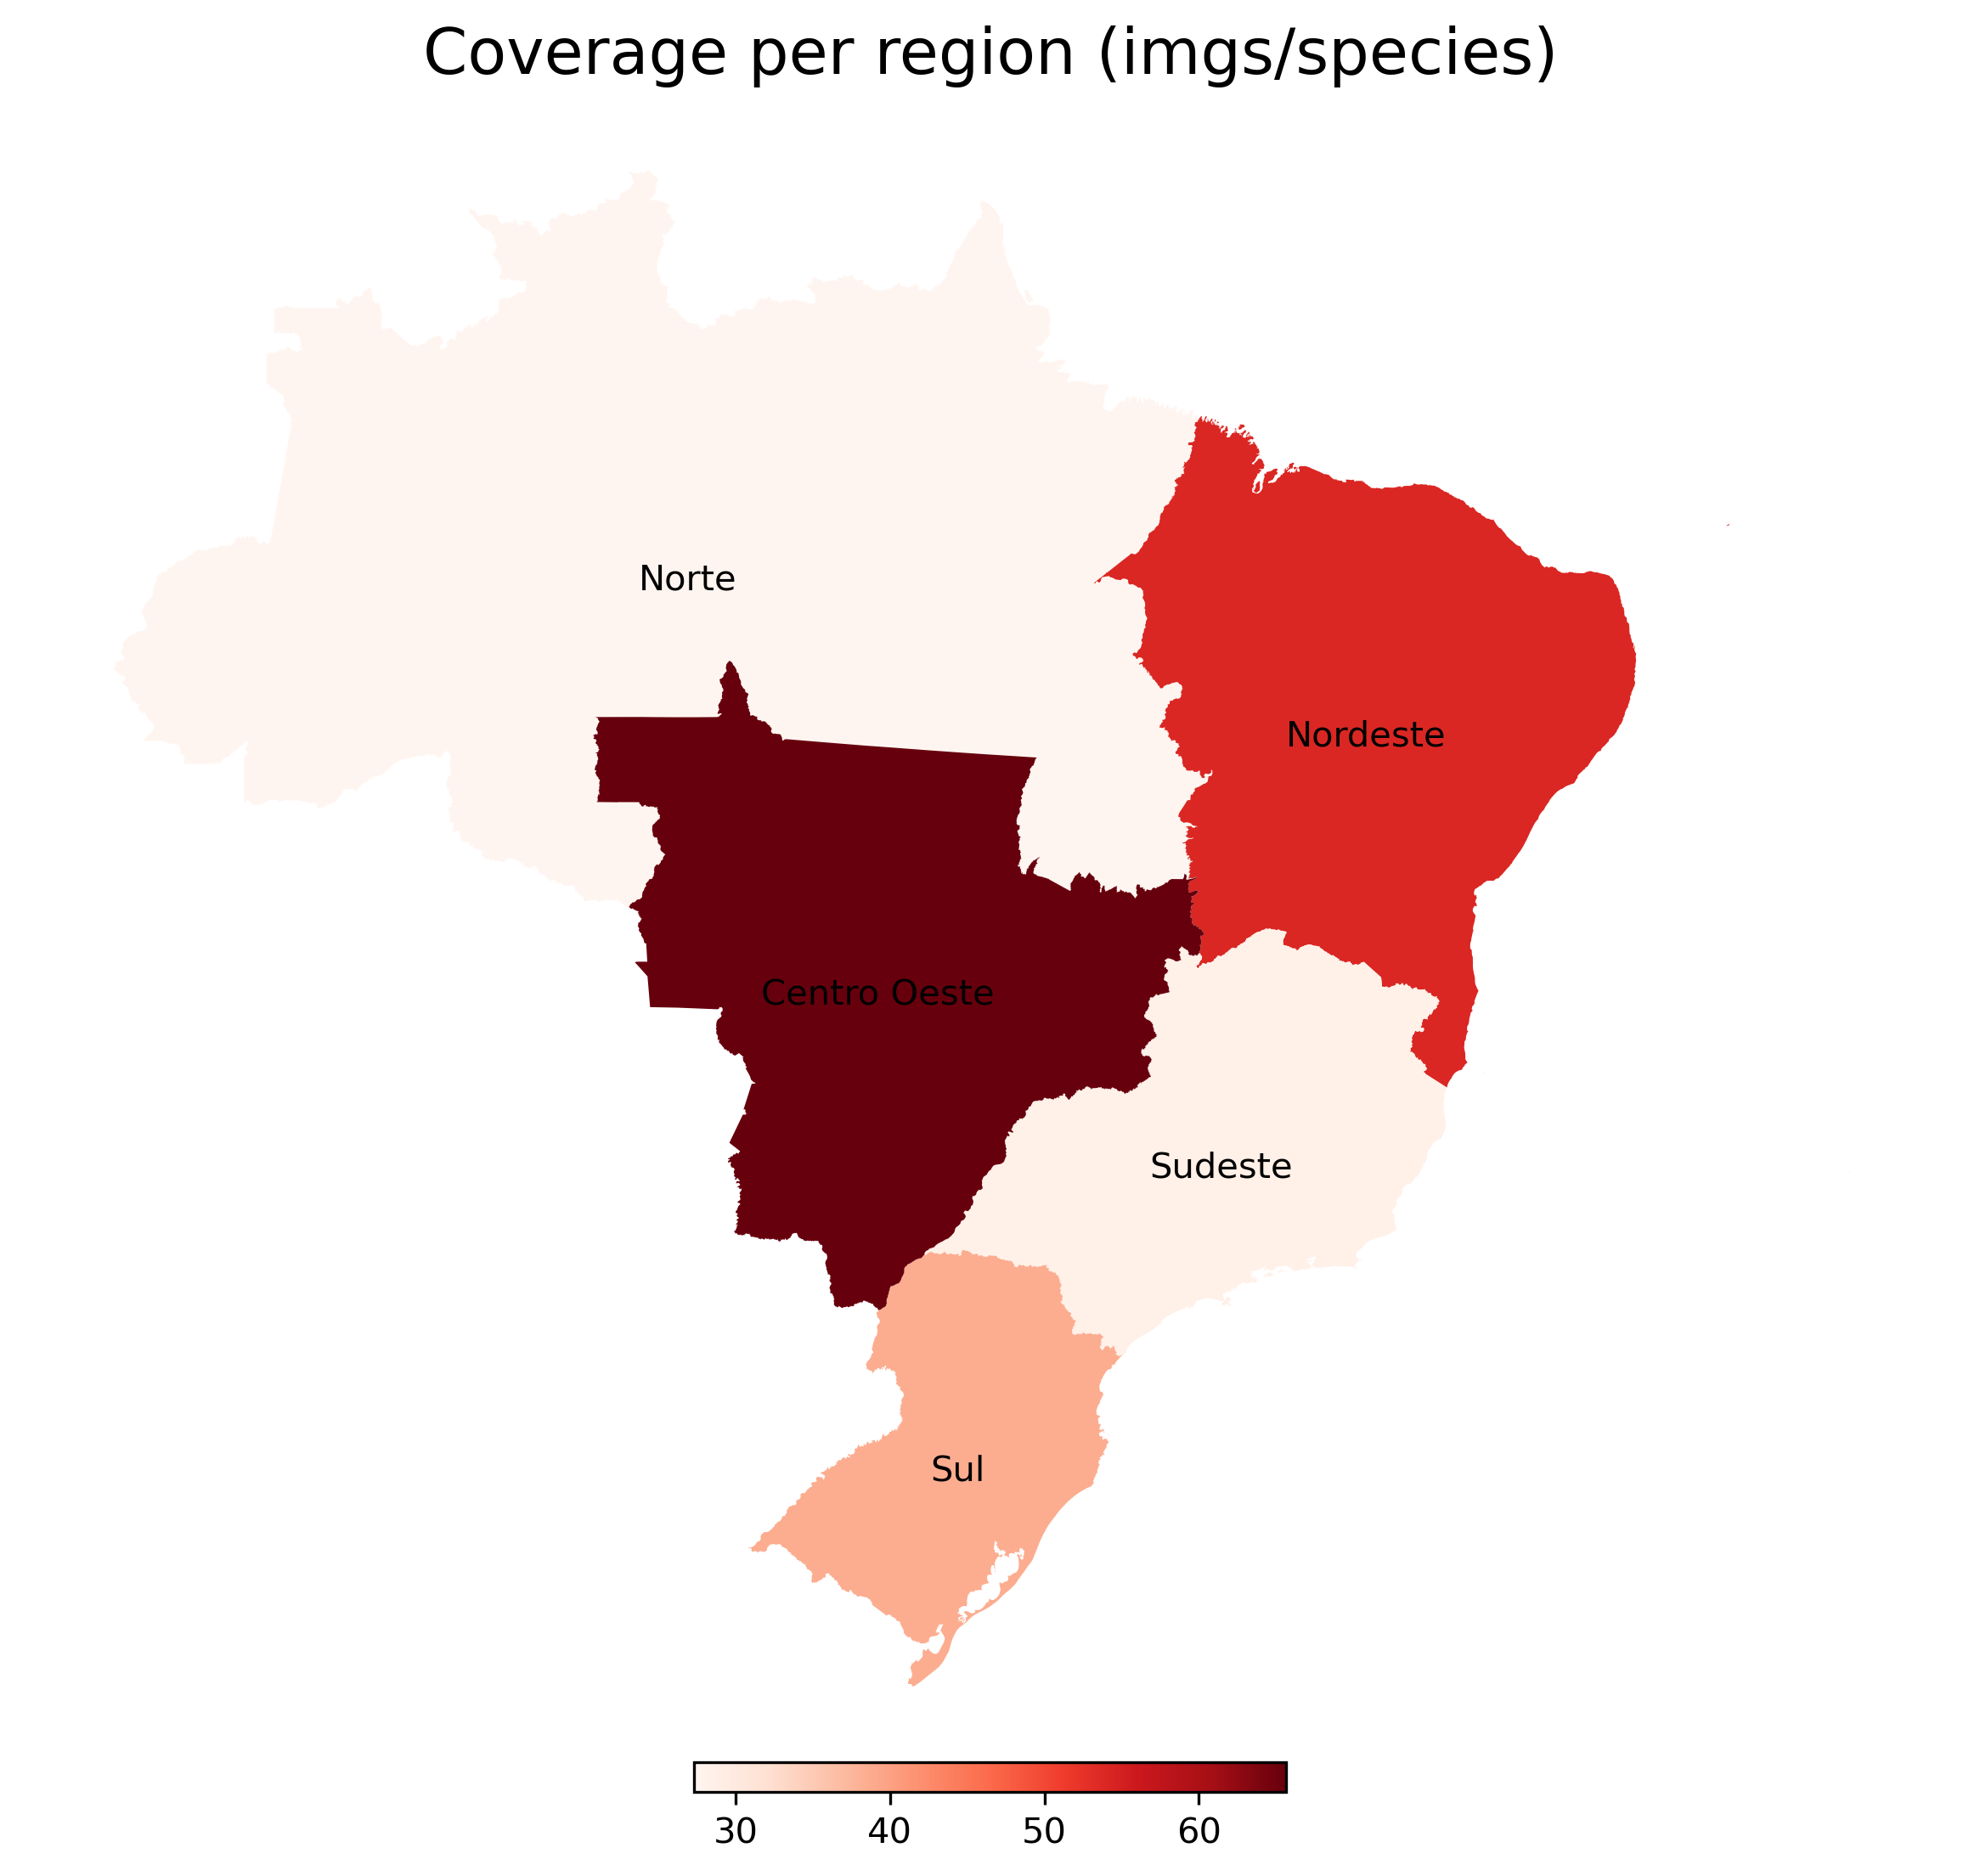

In [45]:
plot_brazil('count_imgs', 'name_region', regions, 'Count images per region (imgs/species)', fontsize=10,
            is_region=True)
plot_brazil('coverage_per_region', 'name_region', regions, 'Coverage per region (imgs/species)', fontsize=10,
            is_region=True)